# Guide on how to use the backtester

In [1]:
# Ensure the project root is in PATH.
import sys

sys.path.append("../")
# All imports of our code are relative to the project root.

from backtester.backtester import Backtester
from backtester.datamodel import TradingState, OrderDepth, Order, Listing
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sys
import os

This is the implementation of our trader

In [40]:
def exit_size_function(z, edge_0, edge_max, max_position = 50):
    # Positive quadratic function with points (0, 0) and (-2, 50)
    if z <= 0:
        if z >= -edge_0:
            return 0
        elif z <= -edge_max:
            return max_position
            
        a = -max_position/(edge_max - edge_0)**2
        return a * (z + edge_max)**2 + max_position
    else:
        if z <= edge_0:
            return 0
        elif z >= edge_max:
            return -max_position
        a = max_position/(edge_max - edge_0)**2
        return a * (z-edge_max)**2 - max_position

import numpy as np

def size_function(z, edge_0, edge_max, max_position = 50):
    z = np.array(z)
    direction = np.where(z > 0, -1, 1)
    abs_z = np.abs(z)
    size = np.where(
        abs_z <= edge_0,
        0,
        np.where(
            abs_z >= edge_max,
            max_position,
            max_position * ((abs_z - edge_0) / (edge_max - edge_0)) ** 2
        )
    )
    return direction * size

import pandas as pd
import numpy as np
# Normal PDF and CDF for Black-Scholes
def norm_pdf(x):
    return (1.0 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

def norm_cdf(x):
    return 0.5 * (1 + np.tanh(np.sqrt(np.pi / 8) * x))  # Approximation

# Black-Scholes price
def bs_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm_cdf(d1) - K * np.exp(-r * T) * norm_cdf(d2)
    else:
        return K * np.exp(-r * T) * norm_cdf(-d2) - S * norm_cdf(-d1)

# Vega: sensitivity of option price to volatility
def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return S * norm_pdf(d1) * np.sqrt(T)

# Delta: rate of change of the option price with respect to the underlying asset price
def delta(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    if option_type == 'call':
        return norm_cdf(d1)
    else:
        return norm_cdf(d1) - 1

# Implied volatility using Newton-Raphson
def implied_vol_newton(market_price, S, K, T, r, option_type='call', tol=1e-6, max_iter=100):
    if market_price is None:
        return np.nan  # Can't compute implied vol without a valid price

    sigma = 0.2  # initial guess
    for _ in range(max_iter):
        price = bs_price(S, K, T, r, sigma, option_type)
        v = vega(S, K, T, r, sigma)
        if v == 0:
            return np.nan
        sigma -= (price - market_price) / v
        if abs(price - market_price) < tol:
            return sigma
    return np.nan  # Did not converge

class Trader:
    day = 2 #Change to 3 for IMC backtest
    def __init__(self):  # Calibrated according to PICNIC_BASKET2.
        self.retreat_per_lot = 0.1
        self.edge_per_lot = 0.2
        self.edge0 = 0

    volcanic_rock_df = pd.DataFrame(columns=[
        "timestamp", "product",
        "bid_price_1", "bid_volume_1", "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3",
        "ask_price_1", "ask_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3",
        "mid_price", "profit_and_loss"
    ])

    volcanic_rock_9500df = pd.DataFrame(columns=[
        "timestamp", "product",
        "bid_price_1", "bid_volume_1", "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3",
        "ask_price_1", "ask_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3",
        "mid_price", "profit_and_loss", 'TTE', 'underlying_price', 'strike', 'implied_vol', 'delta', 'vega', 'm_t'
    ])

    volcanic_rock_9750df = pd.DataFrame(columns=[
        "timestamp", "product",
        "bid_price_1", "bid_volume_1", "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3",
        "ask_price_1", "ask_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3",
        "mid_price", "profit_and_loss", 'TTE', 'underlying_price', 'strike', 'implied_vol', 'delta', 'vega', 'm_t'
    ])

    volcanic_rock_10000df = pd.DataFrame(columns=[
        "timestamp", "product",
        "bid_price_1", "bid_volume_1", "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3",
        "ask_price_1", "ask_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3",
        "mid_price", "profit_and_loss", 'TTE', 'underlying_price', 'strike', 'implied_vol', 'delta', 'vega', 'm_t'
    ])

    volcanic_rock_10250df = pd.DataFrame(columns=[
        "timestamp", "product",
        "bid_price_1", "bid_volume_1", "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3",
        "ask_price_1", "ask_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3",
        "mid_price", "profit_and_loss", 'TTE', 'underlying_price', 'strike', 'implied_vol', 'delta', 'vega', 'm_t'
    ])

    volcanic_rock_10500df = pd.DataFrame(columns=[
        "timestamp", "product",
        "bid_price_1", "bid_volume_1", "bid_price_2", "bid_volume_2", "bid_price_3", "bid_volume_3",
        "ask_price_1", "ask_volume_1", "ask_price_2", "ask_volume_2", "ask_price_3", "ask_volume_3",
        "mid_price", "profit_and_loss", 'TTE', 'underlying_price', 'strike', 'implied_vol', 'delta', 'vega', 'm_t'
    ])

    # “If none of the bots trade on an outstanding player quote, the quote is automatically cancelled at the end of the iteration.”
    def update_df(df, product, state, orders, order_depth):
        buy_orders = sorted(order_depth.buy_orders.items(), key=lambda x: -x[0])
        sell_orders = sorted(order_depth.sell_orders.items(), key=lambda x: x[0])

        bid_levels = buy_orders[:3] + [(None, None)] * (3 - len(buy_orders))
        ask_levels = sell_orders[:3] + [(None, None)] * (3 - len(sell_orders))

        if bid_levels[0][0] is not None and ask_levels[0][0] is not None:
            mid_price = (bid_levels[0][0] + ask_levels[0][0]) / 2
        else:
            mid_price = None

        row = {
            "timestamp": state.timestamp,
            "product": product,
            "bid_price_1": bid_levels[0][0], 
            "bid_volume_1": bid_levels[0][1] or 0,
            "bid_price_2": bid_levels[1][0], 
            "bid_volume_2": bid_levels[1][1] or 0,
            "bid_price_3": bid_levels[2][0], 
            "bid_volume_3": bid_levels[2][1] or 0,
            "ask_price_1": ask_levels[0][0], 
            "ask_volume_1": ask_levels[0][1] or 0,
            "ask_price_2": ask_levels[1][0], 
            "ask_volume_2": ask_levels[1][1] or 0,
            "ask_price_3": ask_levels[2][0], 
            "ask_volume_3": ask_levels[2][1] or 0,
            "mid_price": mid_price,
        }

        if "VOUCHER" in product:
            row["TTE"] = (7000000 - Trader.day * 1000000 - row["timestamp"])/365000000
            buy_orders = sorted(state.order_depths["VOLCANIC_ROCK"].buy_orders.items(), key=lambda x: -x[0])
            sell_orders = sorted(state.order_depths["VOLCANIC_ROCK"].sell_orders.items(), key=lambda x: x[0])

            bid_levels = buy_orders[:3] + [(None, None)] * (3 - len(buy_orders))
            ask_levels = sell_orders[:3] + [(None, None)] * (3 - len(sell_orders))

            if bid_levels[0][0] is not None and ask_levels[0][0] is not None:
                mid_price_vr = (bid_levels[0][0] + ask_levels[0][0]) / 2
            else:
                mid_price_vr = None
            row["underlying_price"] = mid_price_vr
            row['strike'] = int(row["product"][22:])
            row["implied_vol"] = implied_vol_newton(row['mid_price'], row['underlying_price'], row['strike'], row["TTE"], 0, option_type = 'call')
            row["delta"] = delta(row['underlying_price'], row['strike'], row["TTE"], 0, row["implied_vol"], option_type = 'call')
            row["vega"] = vega(row['underlying_price'], row['strike'], row["TTE"], 0, row["implied_vol"])
            row['m_t'] = np.log(row['strike'] / row['underlying_price'])/np.sqrt(row['TTE'])
        row = {k: (np.nan if v is None else v) for k, v in row.items()}
        df.loc[len(df)] = row


    def run(self, state):  # Assuming TradingState is defined elsewhere
        result = {}
        for product in state.order_depths:
            order_depth = state.order_depths[product]
            orders = []
            if product == "VOLCANIC_ROCK":
                volcanic_rock_position = state.position.get(product, 0)
                Trader.update_df(Trader.volcanic_rock_df, product, state, orders, order_depth)
            
            elif product == "VOLCANIC_ROCK_VOUCHER_9750":
                volcanic_rock_9750_position = state.position.get(product, 0)
                Trader.update_df(Trader.volcanic_rock_9750df, product, state, orders, order_depth)
                if len(order_depth.sell_orders) and len(order_depth.buy_orders) and len(Trader.volcanic_rock_9750df) > 0:
                    z_vals = pd.Series(np.linspace(-0.015, 0.015, 500))
                    current_row = Trader.volcanic_rock_9750df.iloc[-1]
                    vol_fair = 0.61633621 * (current_row['m_t'] ** 2)-0.45094566 * current_row['m_t'] + 0.14334967
                    current_iv = current_row['implied_vol']
                    vol_mispricing = current_iv - vol_fair #Measures how high above our fair the current IV is. Could later measure edge based on dollars instead of volpoints.
                    #print(f"TTE: {current_row['TTE']}, Implied Vol: {current_row['implied_vol']}, underlying price: {current_row['underlying_price']}, strike: {current_row['strike']}, m_t: {current_row['m_t']}, delta: {current_row['delta']}, vega: {current_row['vega']}, vol_mispricing: {vol_mispricing}")
                    closest_z = z_vals.iloc[(z_vals - vol_mispricing).abs().idxmin()]
                    entry_position = np.round(size_function(closest_z, 0.005, 0.015, 200)).astype(int)
                    exit_position = np.round(exit_size_function(closest_z, 0.002, 0.01, 200)).astype(int)
                    if vol_mispricing > 0: #doing separate cases for when the vol mispricing is above and below 0.
                        if volcanic_rock_9750_position > entry_position: #we are above leaf, need to sell down to it.
                            orders.append(Order(product, current_row["bid_price_1"], -volcanic_rock_9750_position + entry_position))
                        elif volcanic_rock_9750_position < exit_position: #we are below leaf, need to buy up to it.
                            orders.append(Order(product, current_row["ask_price_1"], -volcanic_rock_9750_position + exit_position))
                    elif vol_mispricing < 0:
                        if volcanic_rock_9750_position < entry_position: #We are below leaf, we need to buy up to it.
                            orders.append(Order(product, current_row["ask_price_1"], -volcanic_rock_9750_position + entry_position))
                        elif volcanic_rock_9750_position > exit_position: #We are above leaf, we need to sell down to it.
                            orders.append(Order(product, current_row["bid_price_1"], -volcanic_rock_9750_position + exit_position))

            elif product == "VOLCANIC_ROCK_VOUCHER_10000":
                volcanic_rock_10000_position = state.position.get(product, 0)
                Trader.update_df(Trader.volcanic_rock_10000df, product, state, orders, order_depth)
                if len(order_depth.sell_orders) and len(order_depth.buy_orders) and len(Trader.volcanic_rock_10000df) > 0:
                    z_vals = pd.Series(np.linspace(-0.025, 0.025, 500))
                    current_row = Trader.volcanic_rock_10000df.iloc[-1]
                    vol_fair = 1.75119318 * (current_row['m_t'] ** 2) + 0.14342421 * current_row['m_t'] + 0.22059232
                    current_iv = current_row['implied_vol']
                    vol_mispricing = current_iv - vol_fair #Measures how high above our fair the current IV is. Could later measure edge based on dollars instead of volpoints.
                    #print(f"TTE: {current_row['TTE']}, Implied Vol: {current_row['implied_vol']}, underlying price: {current_row['underlying_price']}, strike: {current_row['strike']}, m_t: {current_row['m_t']}, delta: {current_row['delta']}, vega: {current_row['vega']}, vol_mispricing: {vol_mispricing}")
                    closest_z = z_vals.iloc[(z_vals - vol_mispricing).abs().idxmin()]
                    entry_position = np.round(size_function(closest_z, 0.00135, 0.025, 200)).astype(int)
                    exit_position = np.round(exit_size_function(closest_z, 0.0005, 0.02, 200)).astype(int)
                    if vol_mispricing > 0: #doing separate cases for when the vol mispricing is above and below 0.
                        if volcanic_rock_10000_position > entry_position: #we are above leaf, need to sell down to it.
                            orders.append(Order(product, current_row["bid_price_1"], -volcanic_rock_10000_position + entry_position))
                        elif volcanic_rock_10000_position < exit_position: #we are below leaf, need to buy up to it.
                            orders.append(Order(product, current_row["ask_price_1"], -volcanic_rock_10000_position + exit_position))
                    elif vol_mispricing < 0:
                        if volcanic_rock_10000_position < entry_position: #We are below leaf, we need to buy up to it.
                            orders.append(Order(product, current_row["ask_price_1"], -volcanic_rock_10000_position + entry_position))
                        elif volcanic_rock_10000_position > exit_position: #We are above leaf, we need to sell down to it.
                            orders.append(Order(product, current_row["bid_price_1"], -volcanic_rock_10000_position + exit_position))
  

            result[product] = orders

        return result, 1, "SAMPLE"


Copy paste these below lines whenever you want to access the historical data. These have datatype `pd.Dataframe`.  

If you want all 3 days combined into 1, then copy the code for `market_data_all3days` and `trades_all3days`. You can't just `pd.concat()` them all because the backtester doesn't consider day.

In [41]:
market_data_round_3_day_0 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_0.csv"), sep=";")
market_data_round_3_day_1 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_1.csv"), sep=";")
market_data_round_3_day_2 = pd.read_csv(os.path.join("..", "data", "round3", "prices_round_3_day_2.csv"), sep=";")

trades_round_3_day_0 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_0.csv"), sep=";")
trades_round_3_day_1 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_1.csv"), sep=";")
trades_round_3_day_2 = pd.read_csv(os.path.join("..", "data", "round3", "trades_round_3_day_2.csv"), sep=";")



# concatenates multiple days of historical data into 1.
# drops day column and replaces it with continuous timestamps.
# i.e. day -1 timestamp 0 becomes just timestamp 1,000,000
def concatenate_historical_data(data: list[pd.DataFrame]) -> pd.DataFrame:
    output = data[0]

    for i in range(1, len(data), 1):
        timeshift = output.iloc[-1]["timestamp"] + 100  # 100 for next day
        next_day_copy = data[i].copy()
        next_day_copy["timestamp"] += timeshift

        output = pd.concat([output, next_day_copy])

    return output


market_data_round_3_all3days = concatenate_historical_data([market_data_round_3_day_0, market_data_round_3_day_1, market_data_round_3_day_2])
trades_round_3_all3days = concatenate_historical_data([trades_round_3_day_0, trades_round_3_day_1, market_data_round_3_day_2])

Lets run the backtester

In [42]:
# 1. Define the listings. (optimisation - only define symbols we are trading)
listings = {
    # "CROISSANTS": Listing(symbol="CROISSANTS", product="CROISSANTS", denomination="SEASHELLS"),
    # "DJEMBES": Listing(symbol="DJEMBES", product="DJEMBES", denomination="SEASHELLS"),
    # "JAMS": Listing(symbol="JAM", product="JAM", denomination="SEASHELLS"),
    # "KELP": Listing(symbol="KELP", product="KELP", denomination="SEASHELLS"),
    # "PICNIC_BASKET1": Listing(symbol="PICNIC_BASKET1", product="PICNIC_BASKET1", denomination="SEASHELLS"),
    # "PICNIC_BASKET2": Listing(symbol="PICNIC_BASKET2", product="PICNIC_BASKET2", denomination="SEASHELLS"),
    #"RAINFOREST_RESIN": Listing(symbol="RAINFOREST_RESIN", product="RAINFOREST_RESIN", denomination="SEASHELLS"),
    # "SQUID_INK": Listing(symbol="SQUID_INK", product="SQUID_INK", denomination="SEASHELLS"),
    "VOLCANIC_ROCK": Listing(symbol="VOLCANIC_ROCK", product="VOLCANIC_ROCK", denomination="SEASHELLS"),
    "VOLCANIC_ROCK_VOUCHER_10000": Listing(symbol="VOLCANIC_ROCK_VOUCHER_10000", product="VOLCANIC_ROCK_VOUCHER_10000", denomination="SEASHELLS"),
    "VOLCANIC_ROCK_VOUCHER_10250": Listing(symbol="VOLCANIC_ROCK_VOUCHER_10250", product="VOLCANIC_ROCK_VOUCHER_10250", denomination="SEASHELLS"),
    "VOLCANIC_ROCK_VOUCHER_10500": Listing(symbol="VOLCANIC_ROCK_VOUCHER_10500", product="VOLCANIC_ROCK_VOUCHER_10500", denomination="SEASHELLS"),
    "VOLCANIC_ROCK_VOUCHER_9500": Listing(symbol="VOLCANIC_ROCK_VOUCHER_9500", product="VOLCANIC_ROCK_VOUCHER_9500", denomination="SEASHELLS"),
    "VOLCANIC_ROCK_VOUCHER_9750": Listing(symbol="VOLCANIC_ROCK_VOUCHER_9750", product="VOLCANIC_ROCK_VOUCHER_9750", denomination="SEASHELLS"),
}

# 2. Define the position limits. (optimisation - only define symbols we are trading)
position_limit = {
    # "CROISSANTS": 250,
    # "DJEMBES": 60,
    # "JAMS": 350,
    # "KELP": 50,
    # "PICNIC_BASKET1": 60,
    # "PICNIC_BASKET2": 100,
    #"RAINFOREST_RESIN": 50,
    # "SQUID_INK": 50,
     "VOLCANIC_ROCK": 400,
    "VOLCANIC_ROCK_VOUCHER_10000": 200,
    "VOLCANIC_ROCK_VOUCHER_10250": 200,
    "VOLCANIC_ROCK_VOUCHER_10500": 200,
    "VOLCANIC_ROCK_VOUCHER_9500": 200,
    "VOLCANIC_ROCK_VOUCHER_9750": 200,
}


# 4. Market data and trade history files. (look at the previous cell)

# 5. Instantiate Trader object
trader = Trader()

# 6. Instantiate Backtester object
bt = Backtester(trader, listings, position_limit, market_data_round_3_day_2, trades_round_3_day_2, output_log_filename = 'options_r3v2.log')


bt.run()


# double layer dictionary.
resinpnl = bt.pnl()["spreadcrossing"]["VOLCANIC_ROCK_VOUCHER_10000"]
totalpnl = bt.pnl()["spreadcrossing"]["total"]
resinpnl, totalpnl, bt.pnl()

(99292.5,
 101640.5,
 {'spreadcrossing': {'VOLCANIC_ROCK_VOUCHER_9750': 2348.0,
   'VOLCANIC_ROCK_VOUCHER_9500': 0.0,
   'VOLCANIC_ROCK': 0.0,
   'VOLCANIC_ROCK_VOUCHER_10250': 0.0,
   'VOLCANIC_ROCK_VOUCHER_10000': 99292.5,
   'VOLCANIC_ROCK_VOUCHER_10500': 0.0,
   'total': 101640.5},
  'midpoint': {'VOLCANIC_ROCK_VOUCHER_9750': 6053.5,
   'VOLCANIC_ROCK_VOUCHER_9500': 0.0,
   'VOLCANIC_ROCK': 0.0,
   'VOLCANIC_ROCK_VOUCHER_10250': 0.0,
   'VOLCANIC_ROCK_VOUCHER_10000': 135327.0,
   'VOLCANIC_ROCK_VOUCHER_10500': 0.0,
   'total': 141380.5}})

You can copy paste everything, except for the Trader algo, which should be whatever algo you wish to backtest.

Let's look at some metrics now.

Note:
- `get_metric` function is now deleted.
- `bt.pnl` is also deleted.
- If you want metrics, use `calculate_metrics(product)`.

Old way:
    bt.get_metric('midpoint_sharpe', 'KELP')

New way:
    metrics = bt.calculate_metrics('KELP')
    metric = metrics['midpoint_sharpe']

Available metrics: dict_keys(['timestamp', 'spreadcrossing_pnl', 'spreadcrossing_final_pnl', 'spreadcrossing_sharpe', 'spreadcrossing_pnl_bps', 'midpoint_pnl', 'midpoint_final_pnl', 'midpoint_sharpe', 'midpoint_pnl_bps'])


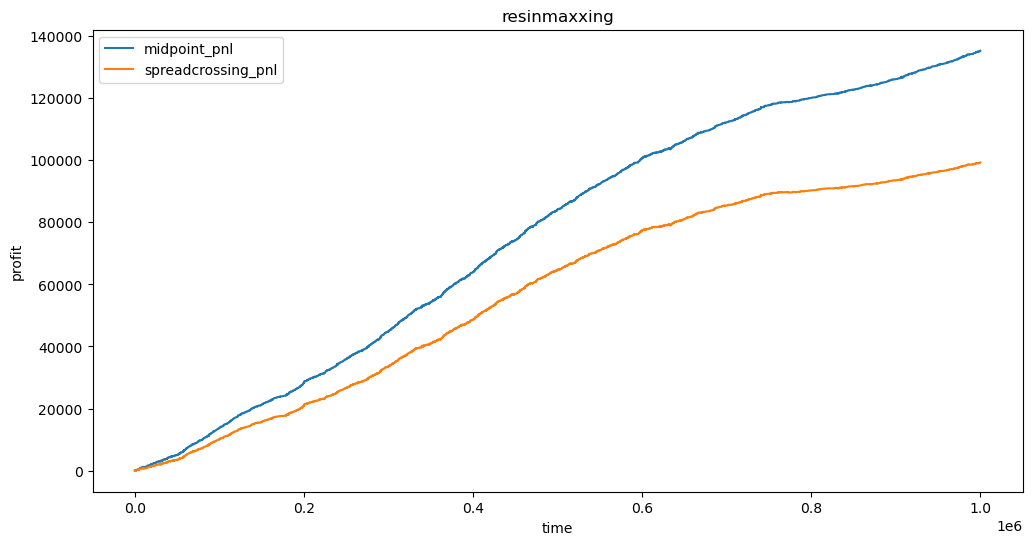

In [43]:
metrics = bt.calculate_metrics("VOLCANIC_ROCK_VOUCHER_10000")

print(f"Available metrics: {metrics.keys()}")

# metrics['timestamp'] is provided for convenience.
# this should line up with metrics['midpoint_pnl'] and metrics['spreadcrossing_pnl'] (i.e. same shape)

plt.figure(figsize=(12, 6))
plt.plot(metrics["timestamp"], metrics["midpoint_pnl"], label="midpoint_pnl")
plt.plot(metrics["timestamp"], metrics["spreadcrossing_pnl"], label="spreadcrossing_pnl")
plt.title("resinmaxxing")
plt.xlabel("time")
plt.ylabel("profit")
plt.legend()